In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import os

In [5]:
FEMTO = '../../../data/10FEMTO/raw_data/Validation_set/'
LEN = 2560

In [6]:
accs = os.listdir(FEMTO+'Bearing1_2')
accs.sort()
accs = [acc for acc in accs if acc.startswith('acc')]
life = len(accs)

# rul = (life - stamp) / life
# for stamp, acc in enumerate(accs):
#     x = pd.read_csv(f'{FEMTO}/Bearing1_2/{acc}',header=None,sep=',', usecols=[4])
#     print(x)
#     rul = (life - stamp) / life

In [7]:
x = pd.read_csv(f'{FEMTO}/Bearing1_2/{accs[800]}',header=None,sep=',', usecols=[4])
x_abs = x.abs()
x_avg = x.sum() / LEN
mean_square_mean = ((x.apply(lambda x: x - x_avg)) ** 2).sum()
p1 = x.min()
print(p1)
p2 = x.max()
print(p2)
p3 = x_abs.max()
print(p3)
p4 = p2 - p1
print(p4)
p5 = x_abs.sum() / LEN
print(p5)
p6 = (x_abs.sum() ** 0.5 / LEN) * 2
print(p6)
p7 = mean_square_mean / (LEN -1)
print(p7)
p8 = (mean_square_mean / LEN) ** 0.5
print(p8)
p9 = ((x ** 2).sum() / LEN) ** 0.5
print(p9)
p10 = ((x.apply(lambda x: x - x_avg)) ** 3).sum() / ((LEN - 1) * (p8 ** 3))
print(p10)
p11 = (LEN * p9) / x_abs.sum()
print(p11)
p12 = p9 / p5
print(p12)
p13 = p3 / p9
print(p13)
p14 = p3 / p5
print(p14)
p15 = p3 / p6
print(p15)
p16 = p3 / (p9 ** 2)
print(p16)
# p6 = ( / LEN).apply()

4   -2.101
dtype: float64
4    1.694
dtype: float64
4    2.101
dtype: float64
4    3.795
dtype: float64
4    0.281054
dtype: float64
4    0.020956
dtype: float64
4    0.000059
dtype: float64
4    0.007701
dtype: float64
4    0.371695
dtype: float64
4   -50.616215
dtype: float64
4    1.322504
dtype: float64
4    1.322504
dtype: float64
4    5.652479
dtype: float64
4    7.475424
dtype: float64
4    100.258436
dtype: float64
4    15.207291
dtype: float64


In [8]:
fft_result = fft(x)
print(len(fft_result))
freq = np.fft.fftfreq(LEN, d=1)  # d是采样间隔，这里假设采样间隔为1

# 绘制傅立叶变换结果
# plt.plot(freq, np.abs(fft_result))
# plt.title('Fourier Transform')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.show()

2560


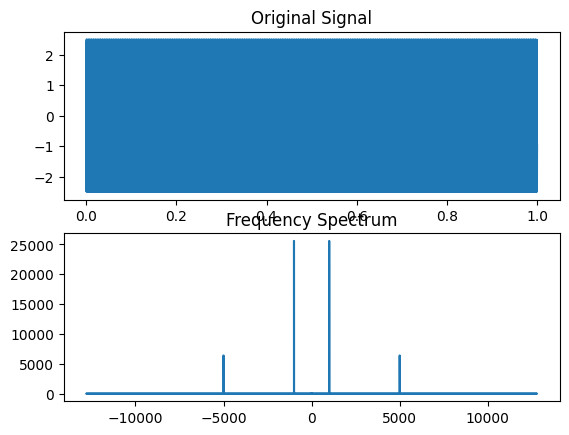

p17: -3.4633558243513106e-11


In [9]:
# 生成一个示例采样数据
fs = 25600  # 采样频率为 25.6 kHz
t = np.arange(0, 1, 1/fs)  # 1秒的时间内进行采样
signal = 2 * np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 5000 * t)

# 进行傅立叶变换
fft_result = np.fft.fft(signal)
N = len(fft_result)
frequencies = np.fft.fftfreq(N, d=1/fs)
amplitudes = np.abs(fft_result)

# 计算 p17
M = len(frequencies)
p17 = np.sum(amplitudes * frequencies) / M

# 绘制原始信号和频谱图
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:M], amplitudes)
plt.title('Frequency Spectrum')

plt.show()

# 打印 p17 的值
print("p17:", p17)

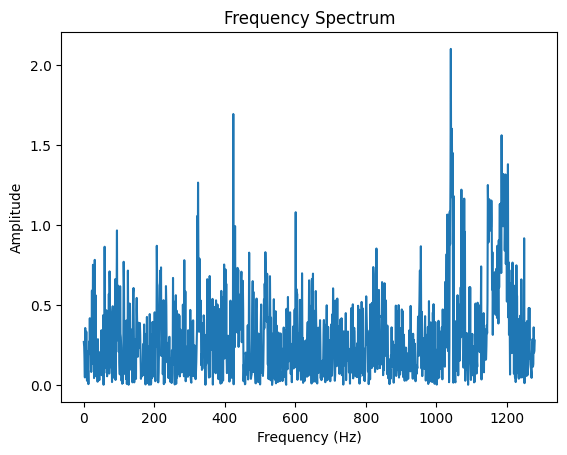

In [10]:
fft_result = np.fft.fft(x)
N = len(fft_result)
frequencies = np.fft.fftfreq(N, d=1/2560)  # 采样频率为 2560 Hz

# 计算频谱幅值
amplitudes = np.abs(fft_result)[:N//2]

# 绘制频谱图
import matplotlib.pyplot as plt

plt.plot(frequencies[:N//2], amplitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

0.281054296875
-1279.9999999999995
37391.19896446221
74760.47725904374


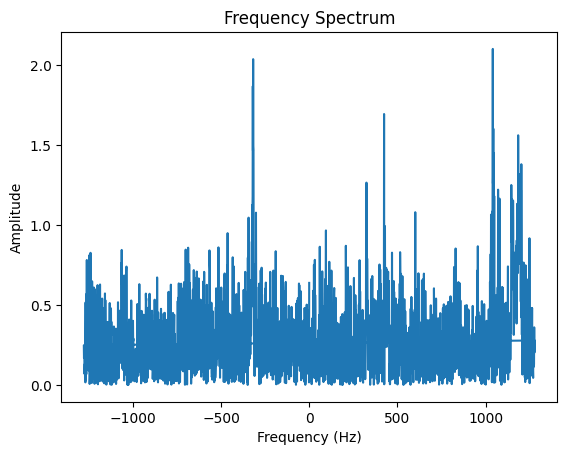

In [11]:
fft_result = np.fft.fft(x)
N = len(fft_result)
frequencies = np.fft.fftfreq(N, d=1/2560)  # 采样频率为 2560 Hz

# 计算频谱幅值
amplitudes = np.abs(fft_result)
p17 = np.sum(amplitudes) / N
p18 = np.sum(frequencies * amplitudes) / np.sum(amplitudes)
p19 = (np.sum(frequencies ** 2 * amplitudes) / np.sum(amplitudes)) ** 0.5
p20 = ((np.sum((frequencies - p18) ** 2 * amplitudes)) / np.sum(amplitudes)) ** 0.5
print(p17)
print(p18)
print(p19)
print(p20)
# 绘制频谱图
import matplotlib.pyplot as plt

plt.plot(frequencies, amplitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

0.281054296875
-0.4999999999999985
14.605937095493047
29.20331142931389


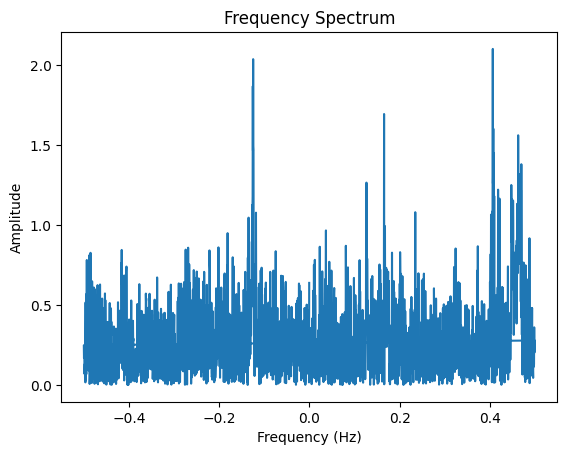

In [12]:
fft_result = np.fft.fft(x.to_numpy())
N = len(fft_result)
frequencies = np.fft.fftfreq(N, d=1)  # 采样频率为 2560 Hz

# 计算频谱幅值
amplitudes = np.abs(fft_result)
p17 = np.sum(amplitudes) / N
p18 = np.sum(frequencies * amplitudes) / np.sum(amplitudes)
p19 = (np.sum(frequencies ** 2 * amplitudes) / np.sum(amplitudes)) ** 0.5
p20 = ((np.sum((frequencies - p18) ** 2 * amplitudes)) / np.sum(amplitudes)) ** 0.5
print(p17)
print(p18)
print(p19)
print(p20)
# 绘制频谱图
import matplotlib.pyplot as plt

plt.plot(frequencies, amplitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()